In [5]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
print("Done!")
import sys
sys.path.append("..")
print("Done!")

Done!
Done!


(60000, 28, 28)
(28, 28)
(784,)


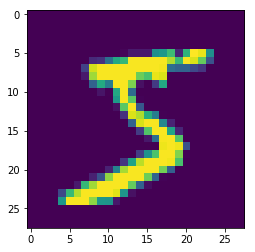

In [3]:
train = np.load("../mnist_xtrain.npy")
print(train.shape)
d = train[0]
print(d.shape)
plt.imshow(d)
d = d/255.
#print(d)
d = utils.flatten(d)
print(d.shape)

Pe:  4.99
Pe2:  0.1
Weight:  0.1499
Pe:  4.97529646501
Pe2:  0.1648001
Weight:  0.23189293549632944
Pe:  4.938851293783268
Pe2:  0.263693700223568
Weight:  0.36212733274749603
Pe:  4.849292151674884
Pe2:  0.41617363478663666
Weight:  0.5639420868379807
Pe:  4.634549587974575
Pe2:  0.6480282648782306
Weight:  0.864273999636709
Pe:  4.149746677300421
Pe2:  0.9837775092817523
Weight:  1.2725167446711927
Pe:  3.201345973113792
Pe2:  1.41346197165442
Weight:  1.7250148237817284
Pe:  1.852964547906308
Pe2:  1.8243527004565012
Weight:  2.0630609114640315
Pe:  0.8239617925467595
Pe2:  2.0241953033222635
Weight:  2.229846870523046
Pe:  0.5280273051416984
Pe2:  2.0055066354441324
Weight:  2.335743096938782
Pe:  0.49601091247550144
Pe2:  1.9282895851977102
Weight:  2.431388364605874
Pe:  0.4871969647655119
Pe2:  1.856060142808987
Weight:  2.5218150514057522
Pe:  0.47758823406953343
Pe2:  1.7933161924025747
Weight:  2.6074617227515366
Pe:  0.466891610938279
Pe2:  1.7385138771195983
Weight:  2.6886

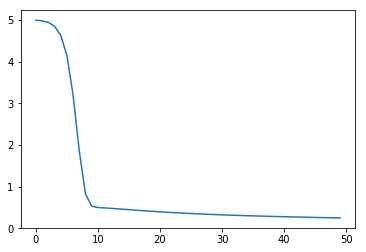

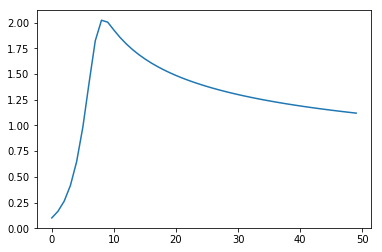

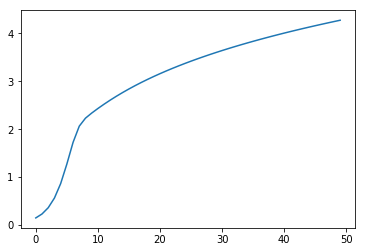

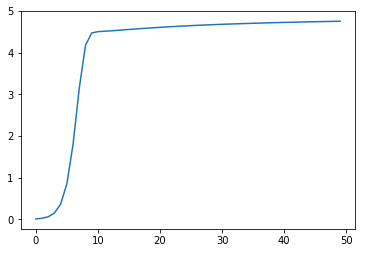

In [13]:

percept = 5
learning_rate = 0.1
weight = 0.1
u2 = 0.1


def update_weight():
    return learning_rate * (pe * u2)
    
def update_cause_unit():
    return learning_rate * ((weight * pe) - pe2)

pes = []
pe2s = []
weights = []
preds = []

    
for i in range(50):
    u1 = percept
    pe = u1 - weight * u2
    pred = weight * u2
    pe2 = u2 # since there is no top down prediction right!
    weight += update_weight()
    u2 += update_cause_unit()
    print("Pe: ", pe)
    print("Pe2: ", pe2)
    print("Weight: ", weight)
    pes.append(pe)
    pe2s.append(pe2)
    weights.append(weight)
    preds.append(pred)
    
pes = np.array(pes)
pe2s = np.array(pe2s)
weights = np.array(weights)
preds = np.array(preds)
plt.plot(pes)
plt.show()
plt.plot(pe2s)
plt.show()
plt.plot(weights)
plt.show()
plt.plot(preds)
plt.show()


Pe:  4.99
Pe2:  0.08
Weight:  0.1499
Pe:  4.97872919
Pe2:  0.12353072000000002
Weight:  0.22054816720610002
Pe:  4.954968898990348
Pe2:  0.1871519834975301
Weight:  0.3217177701171994
Pe:  4.9051756783268
Pe2:  0.2787596964638498
Weight:  0.46629478748735464
Pe:  4.801975767032275
Pe2:  0.40939847879848884
Weight:  0.6702232021968926
Pe:  4.592738979283426
Pe2:  0.5926722395256134
Weight:  0.9493009121980875
Pe:  4.1872098525738215
Pe2:  0.8409804183536064
Weight:  1.3078092491907802
Pe:  3.4703957069411575
Pe2:  1.1533548798001614
Weight:  1.7137042354232719
Pe:  2.4155302858510868
Pe2:  1.4896884675034183
Weight:  2.0779949186314894
Pe:  1.3155062070058845
Pe2:  1.7507535620485064
Weight:  2.3112473876774917
Pe:  0.6747624991242906
Pe2:  1.842885257186392
Weight:  2.43752154080178
Pe:  0.5075200050917594
Pe2:  1.8060348546503944
Weight:  2.531060138583381
Pe:  0.47912659043823336
Pe2:  1.7383645953326554
Weight:  2.6166397196255975
Pe:  0.4638158870898339
Pe2:  1.6726039347601276
Wei

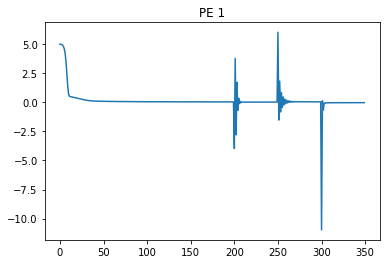

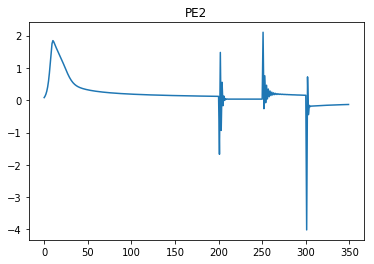

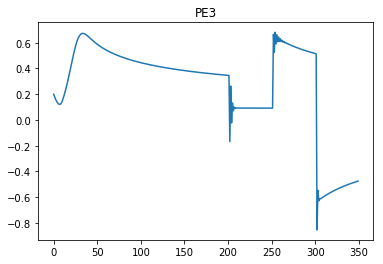

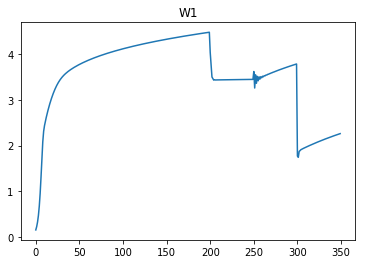

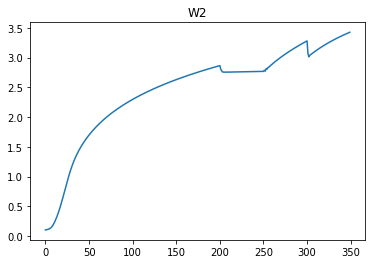

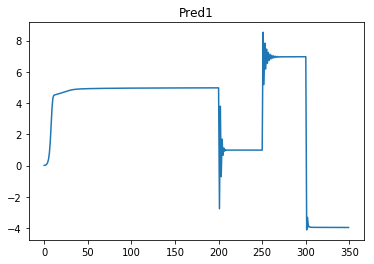

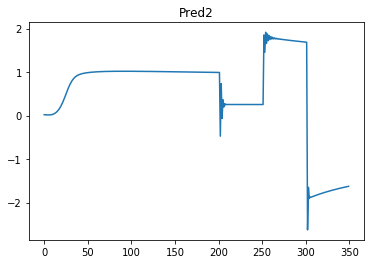

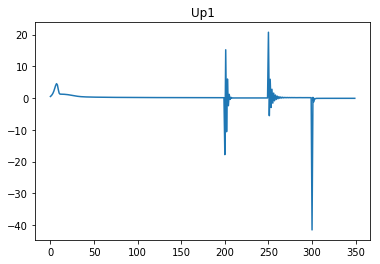

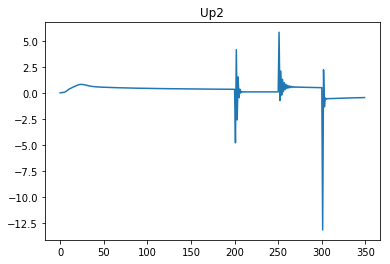

In [37]:

percept = 5
learning_rate = 0.1
w1 = 0.1
w2 = 0.1
u2 = 0.1
u3 = 0.2

def upward_projection(pe, w):
    return pe * w

def update_weight(pe, u):
    return learning_rate * (pe * u)
    
def update_cause_unit(bu , pe):
    return learning_rate * (bu - pe)

def top_down_prediction(w, td):
    return w * td

def prediction_error(u, pred):
    return u - pred

def one_layer():
    pes = []
    pe2s = []
    weights = []
    preds = []


    for i in range(50):
        u1 = percept
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pes.append(pe1)
        pe2s.append(pe2)
        weights.append(w1)
        preds.append(pred)


    pes = np.array(pes)
    pe2s = np.array(pe2s)
    weights = np.array(weights)
    preds = np.array(preds)
    plt.plot(pes)
    plt.show()
    plt.plot(pe2s)
    plt.show()
    plt.plot(weights)
    plt.show()
    plt.plot(preds)
    plt.show()
def two_layers():
    
    percept = 5
    learning_rate = 0.1
    w1 = 0.1
    w2 = 0.1
    u2 = 0.1
    u3 = 0.2

    pe1s = []
    pe2s = []
    pe3s = []
    w1s = []
    w2s = []
    pred1s = []
    pred2s = []
    up1s = []
    up2s = []
    
    def compute_layers():
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(pe1)
        pe2s.append(pe2)
        pe3s.append(pe3)
        w1s.append(w1)
        w2s.append(w2)
        pred1s.append(pred1)
        pred2s.append(pred2)
        up1s.append(up1)
        up2s.append(up2)

    for i in range(200):
        u1 = percept
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(pe1)
        pe2s.append(pe2)
        pe3s.append(pe3)
        w1s.append(w1)
        w2s.append(w2)
        pred1s.append(pred1)
        pred2s.append(pred2)
        up1s.append(up1)
        up2s.append(up2)
        
    for i in range(50):
        u1 = 1
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(pe1)
        pe2s.append(pe2)
        pe3s.append(pe3)
        w1s.append(w1)
        w2s.append(w2)
        pred1s.append(pred1)
        pred2s.append(pred2)
        up1s.append(up1)
        up2s.append(up2)
        
    for i in range(50):
        u1 = 7
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(pe1)
        pe2s.append(pe2)
        pe3s.append(pe3)
        w1s.append(w1)
        w2s.append(w2)
        pred1s.append(pred1)
        pred2s.append(pred2)
        up1s.append(up1)
        up2s.append(up2)
        
    for i in range(50):
        u1 = -4
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(pe1)
        pe2s.append(pe2)
        pe3s.append(pe3)
        w1s.append(w1)
        w2s.append(w2)
        pred1s.append(pred1)
        pred2s.append(pred2)
        up1s.append(up1)
        up2s.append(up2)
        
        


    pe1s = np.array(pe1s)
    pe2s = np.array(pe2s)
    pe3s = np.array(pe3s)
    w1s = np.array(w1s)
    w2s = np.array(w2s)
    pred1s = np.array(pred1s)
    pred2s = np.array(pred2s)
    up1s = np.array(up1s)
    up2s = np.array(up2s)
    plt.plot(pe1s)
    plt.title("PE 1")
    plt.show()
    plt.plot(pe2s)
    plt.title("PE2")
    plt.show()
    plt.plot(pe3s)
    plt.title("PE3")
    plt.show()
    plt.plot(w1s)
    plt.title("W1")
    plt.show()
    plt.plot(w2s)
    plt.title("W2")
    plt.show()
    plt.plot(pred1s)
    plt.title("Pred1")
    plt.show()
    plt.plot(pred2s)
    plt.title("Pred2")
    plt.show()
    plt.plot(up1s)
    plt.title("Up1")
    plt.show()
    plt.plot(up2s)
    plt.title("Up2")
    plt.show()
    
    
    
two_layers()


(2, 1)
(2, 2)
(2, 1)
Pe:  [[0.26]
 [0.67]]
Pe2:  [[0.1]
 [0.1]]
Weight:  [[0.1026 0.3026]
 [0.2067 0.1067]]
Pe:  [[0.2575027 ]
 [0.66693965]]
Pe2:  [[0.106 ]
 [0.1045]]
Weight:  [[0.10532953 0.3052909 ]
 [0.21376956 0.11366952]]
Pe:  [[0.25495728]
 [0.66370942]]
Pe2:  [[0.11182762]
 [0.10895828]]
Weight:  [[0.10818066 0.30806887]
 [0.22119166 0.12090118]]
Pe:  [[0.25235472]
 [0.66029687]]
Pe2:  [[0.1175184 ]
 [0.11339042]]
Weight:  [[0.11114629 0.31093033]
 [0.22895137 0.12838832]]
Pe:  [[0.2496874 ]
 [0.65669042]]
Pe2:  [[0.12310176]
 [0.11780871]]
Weight:  [[0.11421998 0.31387187]
 [0.23703534 0.1361247 ]]
Pe:  [[0.2469489 ]
 [0.65287933]]
Pe2:  [[0.12860179]
 [0.12222251]]
Weight:  [[0.11739579 0.31689014]
 [0.24543149 0.14410436]]
Pe:  [[0.244134  ]
 [0.64885373]]
Pe2:  [[0.13403781]
 [0.12663859]]
Weight:  [[0.12066811 0.31998182]
 [0.25412858 0.15232135]]
Pe:  [[0.2412386 ]
 [0.64460469]]
Pe2:  [[0.13942497]
 [0.13106136]]
Weight:  [[0.12403158 0.32314353]
 [0.26311598 0.16076963

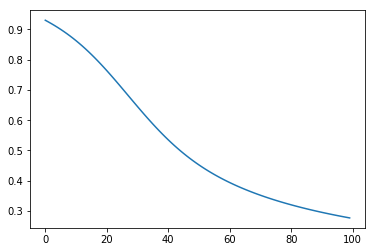

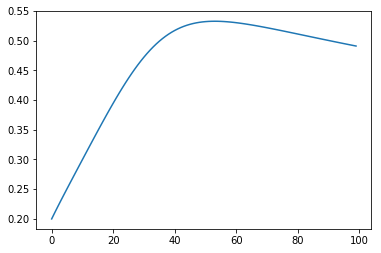

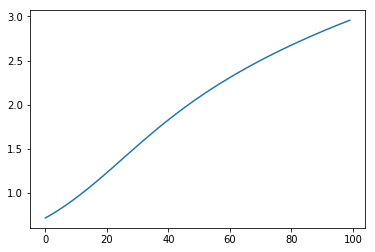

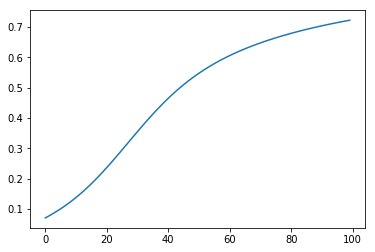

In [46]:

def upward_projection(pe, w):
    return np.dot(w.T, pe)

def update_weight(pe, u):
    return learning_rate * np.dot(pe, u.T)
    
def update_cause_unit(bu , pe):
    return learning_rate * np.subtract(bu, pe)

def top_down_prediction(w, td):
    return np.dot(w, td)

def prediction_error(u, pred):
    return np.subtract(u, pred)

def run_layer():
    
    percept = np.array([0.3,0.7])
    learning_rate = 0.1
    w1 = np.array([[0.1,0.3], [0.2,0.1]])
    u2 = np.array([0.1,0.1])

    pes = []
    pe2s = []
    weights = []
    preds = []

    percept = np.reshape(percept, (2,1))
    u2 = np.reshape(u2, (2,1))
    print(percept.shape)
    print(w1.shape)
    print(u2.shape)
    
    for i in range(100):
        u1 = percept
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pes.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        weights.append(np.sum(w1))
        preds.append(np.sum(pred))


    pes = np.array(pes)
    pe2s = np.array(pe2s)
    weights = np.array(weights)
    preds = np.array(preds)
    plt.plot(pes)
    plt.show()
    plt.plot(pe2s)
    plt.show()
    plt.plot(weights)
    plt.show()
    plt.plot(preds)
    plt.show()
    
    
run_layer()

(2, 1)
(2, 2)
(2, 1)
Pe:  [[0.26]
 [0.67]]
Pe2:  [[0.05]
 [0.  ]]
Weight:  [[0.1026 0.3026]
 [0.2067 0.1067]]
Pe:  [[0.2539637 ]
 [0.66483915]]
Pe2:  [[0.06372375]
 [0.02445   ]]
Weight:  [[0.105419   0.30550788]
 [0.21407971 0.11431241]]
Pe:  [[0.24849816]
 [0.65960292]]
Pe2:  [[0.07603746]
 [0.0447795 ]]
Weight:  [[0.10842522 0.30865968]
 [0.2220593  0.1226784 ]]
Pe:  [[0.24345564]
 [0.65424061]]
Pe2:  [[0.08731188]
 [0.06213168]]
Weight:  [[0.11159287 0.3120069 ]
 [0.23057176 0.13167341]]
Pe:  [[0.23873161]
 [0.64872293]]
Pe2:  [[0.09778025]
 [0.0772539 ]]
Weight:  [[0.11490047 0.31551184]
 [0.23955973 0.14119764]]
Pe:  [[0.23424976]
 [0.64303329]]
Pe2:  [[0.10759308]
 [0.09064997]]
Weight:  [[0.11832971 0.31914459]
 [0.24897325 0.15116982]]
Pe:  [[0.22995285]
 [0.63716262]]
Pe2:  [[0.11685034]
 [0.1026697 ]]
Weight:  [[0.12186475 0.322881  ]
 [0.2587683  0.1615228 ]]
Pe:  [[0.22579694]
 [0.6311064 ]]
Pe2:  [[0.12562079]
 [0.11356319]]
Weight:  [[0.1254917  0.32670124]
 [0.26890569 

Pe:  [[0.03035929]
 [0.08417477]]
Pe2:  [[0.12896014]
 [0.1259096 ]]
Weight:  [[0.46455237 0.66324079]
 [1.34299116 1.23714323]]
Pe:  [[0.03022646]
 [0.08370734]]
Pe2:  [[0.12844933]
 [0.12542786]]
Weight:  [[0.46526977 0.66396777]
 [1.34497788 1.23915648]]
Pe:  [[0.03009491]
 [0.083245  ]]
Pe2:  [[0.12794284]
 [0.12495006]]
Weight:  [[0.46598344 0.66469103]
 [1.34695197 1.24115709]]
Pe:  [[0.02996462]
 [0.08278767]]
Pe2:  [[0.12744062]
 [0.12447616]]
Weight:  [[0.46669344 0.66541062]
 [1.34891358 1.2431452 ]]
Pe:  [[0.02983557]
 [0.08233528]]
Pe2:  [[0.12694263]
 [0.12400611]]
Weight:  [[0.46739979 0.66612658]
 [1.35086285 1.24512097]]
Pe:  [[0.02970773]
 [0.08188776]]
Pe2:  [[0.12644881]
 [0.12353987]]
Weight:  [[0.46810253 0.66683892]
 [1.35279992 1.24708452]]
Pe:  [[0.0295811 ]
 [0.08144503]]
Pe2:  [[0.12595913]
 [0.12307742]]
Weight:  [[0.46880171 0.66754771]
 [1.35472494 1.249036  ]]
Pe:  [[0.02945566]
 [0.08100703]]
Pe2:  [[0.12547354]
 [0.1226187 ]]
Weight:  [[0.46949735 0.6682

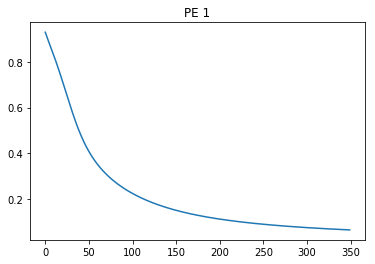

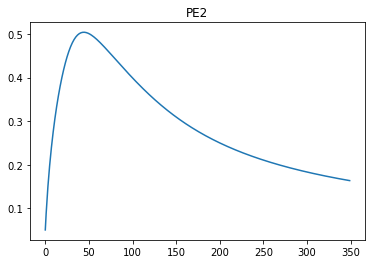

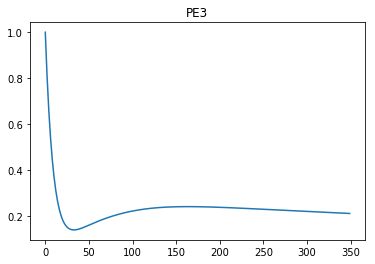

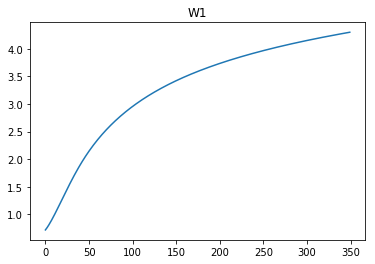

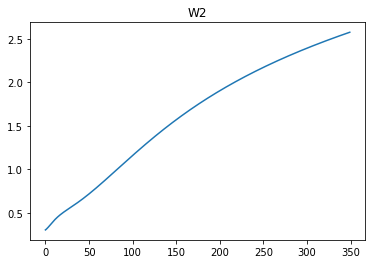

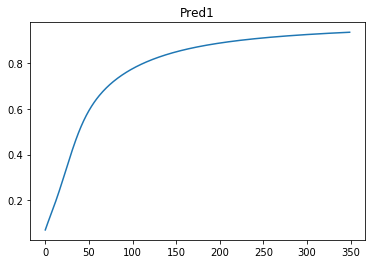

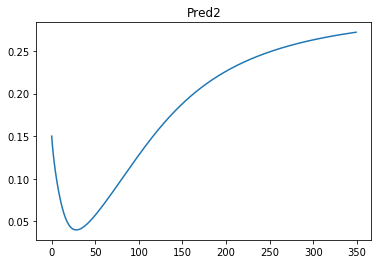

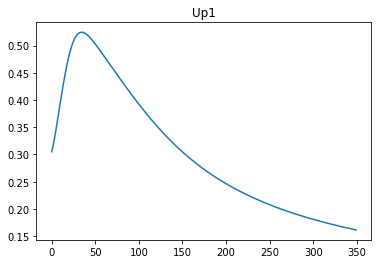

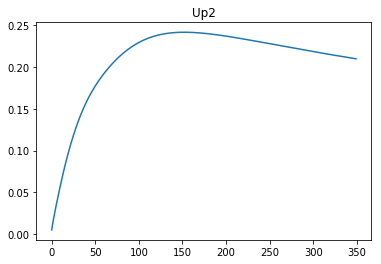

In [53]:


def upward_projection(pe, w):
    return np.dot(w.T, pe)

def update_weight(pe, u):
    return learning_rate * np.dot(pe, u.T)
    
def update_cause_unit(bu , pe):
    return learning_rate * np.subtract(bu, pe)

def top_down_prediction(w, td):
    return np.dot(w, td)

def prediction_error(u, pred):
    return np.subtract(u, pred)
    

def two_layers():
    
    percept = np.array([0.3,0.7])
    learning_rate = 0.1
    w1 = np.array([[0.1,0.3], [0.2,0.1]])
    w2 = np.array([[0.05, 0.05],[0.1,0.1]])
    u2 = np.array([0.1,0.1])
    u3 = np.array([0.5,0.5])

    pes = []
    pe2s = []
    weights = []
    preds = []

    percept = np.reshape(percept, (2,1))
    u2 = np.reshape(u2, (2,1))
    u3 = np.reshape(u3, (2,1))
    print(percept.shape)
    print(w1.shape)
    print(u2.shape)
    

    pe1s = []
    pe2s = []
    pe3s = []
    w1s = []
    w2s = []
    pred1s = []
    pred2s = []
    up1s = []
    up2s = []


    for i in range(200):
        u1 = percept
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        
    for i in range(50):
        u1 = percept 
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        
    for i in range(50):
        u1 = percept
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        
    for i in range(50):
        u1 = percept
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        
        


    pe1s = np.array(pe1s)
    pe2s = np.array(pe2s)
    pe3s = np.array(pe3s)
    w1s = np.array(w1s)
    w2s = np.array(w2s)
    pred1s = np.array(pred1s)
    pred2s = np.array(pred2s)
    up1s = np.array(up1s)
    up2s = np.array(up2s)
    print("\n")
    print(pe1s)
    print(pe1s.shape)
    print(pe1s[0])
    print(type(pe1s[0]))
    plt.plot(pe1s)
    plt.title("PE 1")
    plt.show()
    plt.plot(pe2s)
    plt.title("PE2")
    plt.show()
    plt.plot(pe3s)
    plt.title("PE3")
    plt.show()
    plt.plot(w1s)
    plt.title("W1")
    plt.show()
    plt.plot(w2s)
    plt.title("W2")
    plt.show()
    plt.plot(pred1s)
    plt.title("Pred1")
    plt.show()
    plt.plot(pred2s)
    plt.title("Pred2")
    plt.show()
    plt.plot(up1s)
    plt.title("Up1")
    plt.show()
    plt.plot(up2s)
    plt.title("Up2")
    plt.show()
    
    
    
two_layers()

(60000, 28, 28)
(28, 28)


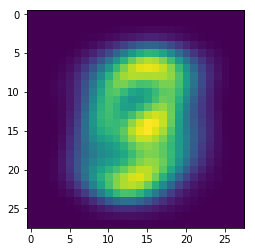

In [5]:


import numpy as np
import matplotlib.pyplot as plt

train = np.load("../mnist_xtrain.npy")
print(train.shape)
mu = np.mean(train, axis=0)
print(mu.shape)
plt.imshow(mu)
plt.show()


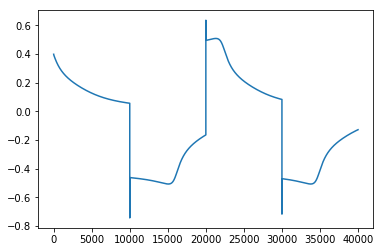

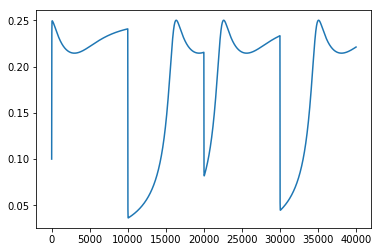

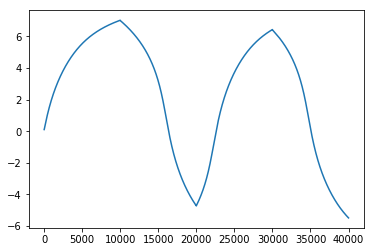

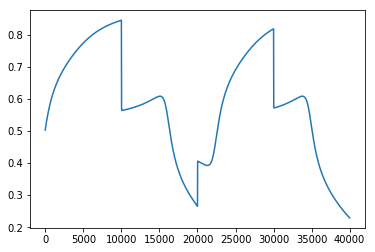

In [38]:

learning_rate = 0.1
cause_learning_rate = 10

def sigmoid(x):
    return 1 / (1 + np.exp(-1*x))

def sigmoidderiv(x):
    return sigmoid(x) * (1 - sigmoid(x))


def upward_projection(predderiv ,pe, w):
    return sigmoidderiv(pe * w)

def prediction_deriv(w, u):
    return sigmoidderiv(w*u)

def update_weight(predderiv, pe, u):
    return learning_rate * (u * predderiv * pe)
    
def update_cause_unit(bu , pe):
    return learning_rate * (bu - pe)

def top_down_prediction(w, td):
    return sigmoid(w * td)

def prediction_error(u, pred):
    return u - pred

def one_layer():
    
    percept = 0.9
    #learning_rate = 2
    w1 = 0.1
    w2 = 0.1
    u2 = 0.1
    u3 = 0.2


    pes = []
    pe2s = []
    weights = []
    preds = []


    for i in range(10000):
        u1 = percept
        pred = top_down_prediction(w1, u2)
        predderiv = prediction_deriv(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(predderiv,pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(predderiv, pe1, u2)
        u2 += update_cause_unit(up1, pe2)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        #print("Pe: ", pe1)
        #print("Pe2: ", pe2)
        #print("Weight: ", w1)
        pes.append(pe1)
        pe2s.append(pe2)
        weights.append(w1)
        preds.append(pred)
        
    for i in range(10000):
        u1 = 0.1
        pred = top_down_prediction(w1, u2)
        predderiv = prediction_deriv(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(predderiv,pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(predderiv, pe1, u2)
        u2 += update_cause_unit(up1, pe2)

        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 
        #weight += update_weight()
        #u2 += update_cause_unit()
        #print("Pe: ", pe1)
        #print("Pe2: ", pe2)
        #print("Weight: ", w1)
        pes.append(pe1)
        pe2s.append(pe2)
        weights.append(w1)
        preds.append(pred)
        
    for i in range(10000):
        u1 = percept
        pred = top_down_prediction(w1, u2)
        predderiv = prediction_deriv(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(predderiv,pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(predderiv, pe1, u2)
        u2 += update_cause_unit(up1, pe2)

        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 #
        #weight += update_weight()
        #u2 += update_cause_unit()
        #print("Pe: ", pe1)
        #print("Pe2: ", pe2)
        #print("Weight: ", w1)
        pes.append(pe1)
        pe2s.append(pe2)
        weights.append(w1)
        preds.append(pred)

    for i in range(10000):
        u1 = 0.1
        pred = top_down_prediction(w1, u2)
        predderiv = prediction_deriv(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(predderiv,pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(predderiv, pe1, u2)
        u2 += update_cause_unit(up1, pe2)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 # since there is no top down prediction right!
        #weight += update_weight()
        #u2 += update_cause_unit()
        #print("Pe: ", pe1)
        #print("Pe2: ", pe2)
        #print("Weight: ", w1)
        pes.append(pe1)
        pe2s.append(pe2)
        weights.append(w1)
        preds.append(pred)

    pes = np.array(pes)
    pe2s = np.array(pe2s)
    weights = np.array(weights)
    preds = np.array(preds)
    plt.plot(pes)
    plt.show()
    plt.plot(pe2s)
    plt.show()
    plt.plot(weights)
    plt.show()
    plt.plot(preds)
    plt.show()
    # now let's see if my updated version with equations actually works!
    # okay... so yay!!! that appears to work... I have the most basic understanding of predictive processin gpossible...
    # I'm predicting the number 5!!!
    # let's see if it works at all... with the activatoin functions...
    # it almost certainly won't, which is frustrating... argh!
one_layer()

# o it does seem likely to actually converge... but at a MUCH slower pace than before?
# which is a little worrying... I dno't know why... probaly because it bounds the updates
# I mean I can do relu instead...?
# but like yeah... this does have REALLY SLOW convergence while linear networks are a WHOLE LOT FASTER

# so it kind of works though, but at the cost of extreme slowness... which is unfortunate!
# I wonder how much it will work... but this claims to converge... things to do, obviously,
# are to do it for matrices... I can do that now
# and for a 2x2 network
# that's some funny patterns... but it sure takes a while to learn this... so who knows?
# it creates some funny patterns that's for sure... but who knows if it can larn anything, but these distinctions in temopral times
# are very important... generally activvatoin updates should happen on a signifiacntly greater timescale than weight updates... and the learning rates
# should reflect that!
# or else run the activations to convergence before even attempting to update the weights

(2, 1)
(2, 2)
(2, 1)
Pe:  [[-0.40999867]
 [ 0.39250056]]
Pe2:  [[-0.4124974 ]
 [-0.42497919]]
Weight:  [[0.09897541 0.29897541]
 [0.20098103 0.10098103]]
Pe:  [[-0.41662348]
 [ 0.38742241]]
Pe2:  [[-0.34440804]
 [-0.35502103]]
Weight:  [[0.09724583 0.29723321]
 [0.20259015 0.10260189]]
Pe:  [[-0.42240709]
 [ 0.38273105]]
Pe2:  [[-0.28354659]
 [-0.29255045]]
Weight:  [[0.09486747 0.29483126]
 [0.20474688 0.10478   ]]
Pe:  [[-0.42738444]
 [ 0.37834134]]
Pe2:  [[-0.22909489]
 [-0.23671397]]
Weight:  [[0.09189519 0.29182597]
 [0.20738104 0.10744343]]
Pe:  [[-0.43159837]
 [ 0.3741896 ]]
Pe2:  [[-0.18033965]
 [-0.18676764]]
Weight:  [[0.08838182 0.28827151]
 [0.21043115 0.11052921]]
Pe:  [[-0.43509671]
 [ 0.37022839]]
Pe2:  [[-0.13665619]
 [-0.14206017]]
Weight:  [[0.08437759 0.28421934]
 [0.21384312 0.11398203]]
Pe:  [[-0.43792995]
 [ 0.36642253]]
Pe2:  [[-0.09749534]
 [-0.1020193 ]]
Weight:  [[0.07992986 0.2797179 ]
 [0.21756926 0.11775317]]
Pe:  [[-0.44014945]
 [ 0.36274603]]
Pe2:  [[-0.0

Pe:  [[-0.16615344]
 [ 0.13539272]]
Pe2:  [[0.24469354]
 [0.24591872]]
Weight:  [[-0.74699832 -0.55576209]
 [ 0.80216532  0.70839935]]
Pe:  [[-0.16532945]
 [ 0.13480402]]
Pe2:  [[0.24470476]
 [0.24592243]]
Weight:  [[-0.74950751 -0.55829531]
 [ 0.80405107  0.71030317]]
Pe:  [[-0.16451185]
 [ 0.13421918]]
Pe2:  [[0.24471608]
 [0.24592627]]
Weight:  [[-0.75199999 -0.56081163]
 [ 0.80592587  0.71219591]]
Pe:  [[-0.16370059]
 [ 0.13363816]]
Pe2:  [[0.24472749]
 [0.24593024]]
Weight:  [[-0.75447593 -0.56331123]
 [ 0.80778982  0.71407766]]
Pe:  [[-0.16289558]
 [ 0.13306092]]
Pe2:  [[0.24473899]
 [0.24593434]]
Weight:  [[-0.75693548 -0.56579424]
 [ 0.80964298  0.71594851]]
Pe:  [[-0.16209677]
 [ 0.13248744]]
Pe2:  [[0.24475058]
 [0.24593856]]
Weight:  [[-0.75937879 -0.56826084]
 [ 0.81148547  0.71780855]]
Pe:  [[-0.16130408]
 [ 0.13191767]]
Pe2:  [[0.24476225]
 [0.24594291]]
Weight:  [[-0.76180603 -0.57071118]
 [ 0.81331735  0.71965787]]
Pe:  [[-0.16051744]
 [ 0.13135158]]
Pe2:  [[0.244774  ]

Pe:  [[-0.08908815]
 [ 0.07679907]]
Pe2:  [[0.24645243]
 [0.24694816]]
Weight:  [[-0.99441586 -0.80538785]
 [ 0.99626764  0.90423214]]
Pe:  [[-0.08876264]
 [ 0.07653484]]
Pe2:  [[0.24646225]
 [0.24695511]]
Weight:  [[-0.99551299 -0.80649398]
 [ 0.99716568  0.90513754]]
Pe:  [[-0.08843877]
 [ 0.0762718 ]]
Pe2:  [[0.24647204]
 [0.24696204]]
Weight:  [[-0.99660492 -0.80759486]
 [ 0.99805979  0.90603898]]
Pe:  [[-0.08811653]
 [ 0.07600993]]
Pe2:  [[0.24648179]
 [0.24696895]]
Weight:  [[-0.9976917  -0.80869053]
 [ 0.99895     0.90693648]]
Pe:  [[-0.0877959 ]
 [ 0.07574923]]
Pe2:  [[0.2464915 ]
 [0.24697584]]
Weight:  [[-0.99877335 -0.80978103]
 [ 0.99983633  0.90783005]]
Pe:  [[-0.08747689]
 [ 0.07548969]]
Pe2:  [[0.24650117]
 [0.24698271]]
Weight:  [[-0.99984991 -0.81086639]
 [ 1.00071879  0.90871973]]
Pe:  [[-0.08715946]
 [ 0.0752313 ]]
Pe2:  [[0.24651081]
 [0.24698957]]
Weight:  [[-1.00092141 -0.81194663]
 [ 1.00159741  0.90960552]]
Pe:  [[-0.08684361]
 [ 0.07497405]]
Pe2:  [[0.24652041]

Weight:  [[-1.15630138 -0.96850479]
 [ 1.1319772   1.04097336]]
Pe:  [[-0.04126651]
 [ 0.03634334]]
Pe2:  [[0.24797005]
 [0.24811428]]
Weight:  [[-1.15672526 -0.96893159]
 [ 1.13233957  1.04133823]]
Pe:  [[-0.04113958]
 [ 0.03623164]]
Pe2:  [[0.24797413]
 [0.24811768]]
Weight:  [[-1.1571476  -0.96935684]
 [ 1.13270064  1.04170178]]
Pe:  [[-0.04101307]
 [ 0.03612028]]
Pe2:  [[0.2479782 ]
 [0.24812107]]
Weight:  [[-1.1575684  -0.96978054]
 [ 1.13306042  1.04206404]]
Pe:  [[-0.04088698]
 [ 0.03600926]]
Pe2:  [[0.24798226]
 [0.24812446]]
Weight:  [[-1.15798767 -0.97020269]
 [ 1.13341891  1.04242499]]
Pe:  [[-0.0407613 ]
 [ 0.03589859]]
Pe2:  [[0.2479863 ]
 [0.24812783]]
Weight:  [[-1.15840541 -0.9706233 ]
 [ 1.13377612  1.04278466]]
Pe:  [[-0.04063604]
 [ 0.03578826]]
Pe2:  [[0.24799034]
 [0.24813119]]
Weight:  [[-1.15882164 -0.97104239]
 [ 1.13413205  1.04314303]]
Pe:  [[-0.04051119]
 [ 0.03567828]]
Pe2:  [[0.24799435]
 [0.24813455]]
Weight:  [[-1.15923635 -0.97145994]
 [ 1.13448671  1.04

 [ 0.02168038]]
Pe2:  [[0.2485013 ]
 [0.24857167]]
Weight:  [[-1.20973516 -1.02228881]
 [ 1.17773925  1.08703537]]
Pe:  [[-0.02472761]
 [ 0.02161135]]
Pe2:  [[0.2485038]
 [0.2485739]]
Weight:  [[-1.20997014 -1.02252525]
 [ 1.17794021  1.08723756]]
Pe:  [[-0.02465119]
 [ 0.02154251]]
Pe2:  [[0.2485063 ]
 [0.24857612]]
Weight:  [[-1.21020432 -1.02276086]
 [ 1.17814046  1.08743904]]
Pe:  [[-0.024575  ]
 [ 0.02147386]]
Pe2:  [[0.24850879]
 [0.24857835]]
Weight:  [[-1.21043768 -1.02299566]
 [ 1.17834     1.08763981]]
Pe:  [[-0.02449901]
 [ 0.02140539]]
Pe2:  [[0.24851127]
 [0.24858056]]
Weight:  [[-1.21067023 -1.02322964]
 [ 1.17853884  1.08783987]]
Pe:  [[-0.02442325]
 [ 0.02133712]]
Pe2:  [[0.24851375]
 [0.24858277]]
Weight:  [[-1.21090198 -1.02346281]
 [ 1.17873697  1.08803923]]
Pe:  [[-0.02434769]
 [ 0.02126902]]
Pe2:  [[0.24851622]
 [0.24858498]]
Weight:  [[-1.21113292 -1.02369518]
 [ 1.17893441  1.08823788]]
Pe:  [[-0.02427235]
 [ 0.02120112]]
Pe2:  [[0.24851868]
 [0.24858718]]
Weight

Pe:  [[-0.01334421]
 [ 0.01129215]]
Pe2:  [[0.24888903]
 [0.24892668]]
Weight:  [[-1.2426578  -1.05540355]
 [ 1.20564305  1.11510202]]
Pe:  [[-0.01329853]
 [ 0.01125053]]
Pe2:  [[0.24889066]
 [0.24892822]]
Weight:  [[-1.24277711 -1.05552352]
 [ 1.20574239  1.11520191]]
Pe:  [[-0.01325297]
 [ 0.01120901]]
Pe2:  [[0.2488923 ]
 [0.24892975]]
Weight:  [[-1.24289599 -1.05564304]
 [ 1.20584135  1.1153014 ]]
Pe:  [[-0.01320753]
 [ 0.01116761]]
Pe2:  [[0.24889393]
 [0.24893129]]
Weight:  [[-1.24301443 -1.05576213]
 [ 1.20593992  1.11540051]]
Pe:  [[-0.01316221]
 [ 0.0111263 ]]
Pe2:  [[0.24889555]
 [0.24893282]]
Weight:  [[-1.24313244 -1.05588078]
 [ 1.20603811  1.11549923]]
Pe:  [[-0.013117  ]
 [ 0.01108511]]
Pe2:  [[0.24889718]
 [0.24893434]]
Weight:  [[-1.24325002 -1.055999  ]
 [ 1.20613591  1.11559756]]
Pe:  [[-0.01307191]
 [ 0.01104402]]
Pe2:  [[0.2488988 ]
 [0.24893587]]
Weight:  [[-1.24336717 -1.05611678]
 [ 1.20623333  1.11569551]]
Pe:  [[-0.01302694]
 [ 0.01100303]]
Pe2:  [[0.24890041]

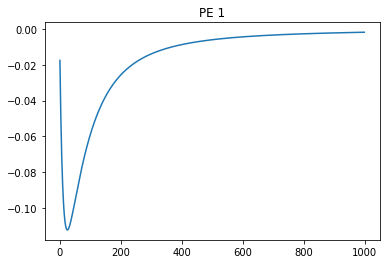

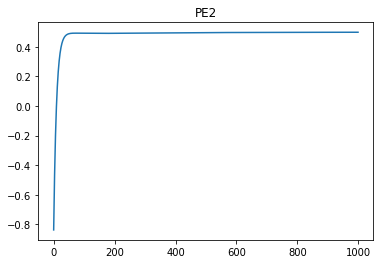

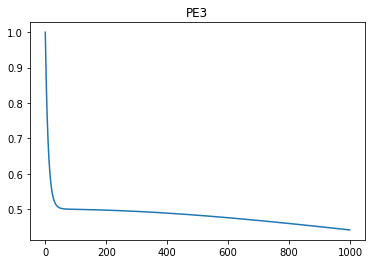

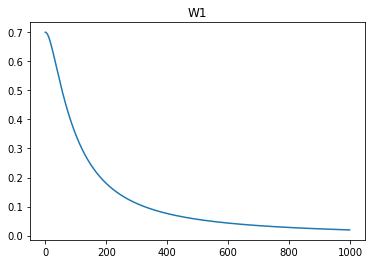

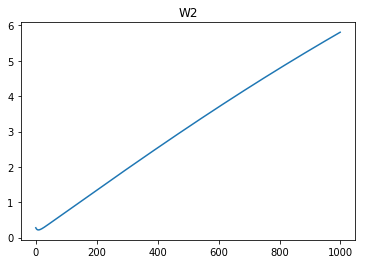

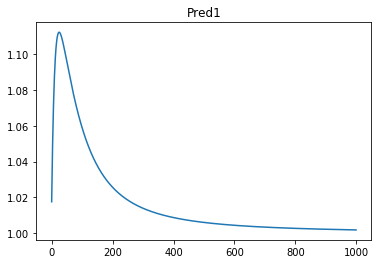

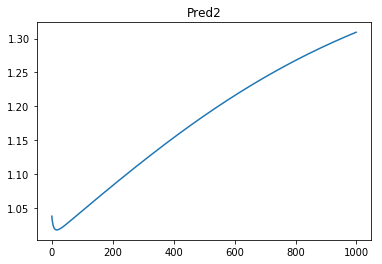

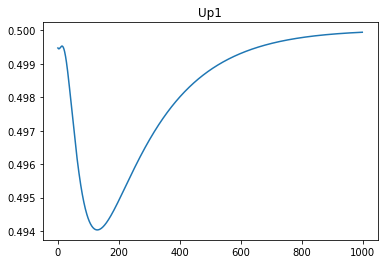

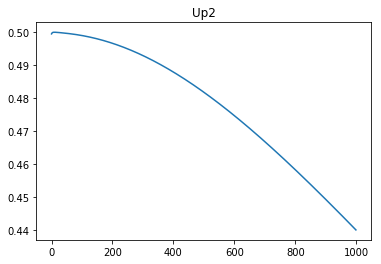

In [37]:
# now let's try 2x2 matrices AND two layers... to see if this will function, at all!
# get this working tomorrow!
def sigmoid(x):
    return 1 / (1 + np.exp(-1*x))

def sigmoidderiv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def upward_projection(pe, w):
    return sigmoidderiv(np.dot(w.T, pe)) # having this be nonlinear isreally bad, as it loses the point that the upwards
# prediction errors should be linear!!! that seems to be important to me... linear = driving, nonlinear = modulatory
# I@m not sure how the rest of it works?

def update_weight(predderiv, pe, u):
    return learning_rate * np.dot(pe * predderiv,  u.T)
    
def update_cause_unit(bu , pe):
    return learning_rate * np.subtract(bu, pe)

def top_down_prediction(w, td):
    return sigmoid(np.dot(w, td))

def prediction_error(u, pred):
    return np.subtract(u, pred)

def prediction_derivative(w,u):
    return sigmoidderiv(np.dot(w, u))
    

def two_layers():
    
    percept = np.array([0.1, 0.9])
    learning_rate = 0.1
    w1 = np.array([[0.1,0.3], [0.2,0.1]])
    w2 = np.array([[0.05, 0.05],[0.1,0.1]])
    u2 = np.array([0.1,0.1])
    u3 = np.array([0.5,0.5])

    pes = []
    pe2s = []
    weights = []
    preds = []

    percept = np.reshape(percept, (2,1))
    u2 = np.reshape(u2, (2,1))
    u3 = np.reshape(u3, (2,1))
    print(percept.shape)
    print(w1.shape)
    print(u2.shape)
    

    pe1s = []
    pe2s = []
    pe3s = []
    w1s = []
    w2s = []
    pred1s = []
    pred2s = []
    up1s = []
    up2s = []


    # there's another fascinating question, which I can explore in this really simple setting...
    # do Iwant to update all the layers individually, BEFORE! calculating predictions/prediction errors to later settings
    # or do I want to do it all first and ten update... let's do it all first and the update...
    # but this is some degree of freedom I should play around with!
    for i in range(1000):
        u1 = percept
        pred1 = top_down_prediction(w1, u2)
        predderiv1 = prediction_derivative(w1 , u2) # I need to think about what the math is telling me here... does this scheme even make snese
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        predderiv2 = prediction_derivative(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(predderiv1,pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(predderiv2, pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 # since there is no top down prediction right!
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
     
    """
    for i in range(50):
        # let's flip it to smoe other percept
        u1 = percept 
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 # since there is no top down prediction right!
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        
    for i in range(50):
        # let's flip it to smoe other percept
        u1 = percept
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 # since there is no top down prediction right!
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        
    for i in range(50):
        # let's flip it to smoe other percept
        u1 = percept
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 # since there is no top down prediction right!
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        """
        


    pe1s = np.array(pe1s)
    pe2s = np.array(pe2s)
    pe3s = np.array(pe3s)
    w1s = np.array(w1s)
    w2s = np.array(w2s)
    pred1s = np.array(pred1s)
    pred2s = np.array(pred2s)
    up1s = np.array(up1s)
    up2s = np.array(up2s)
    print("\n")
    print(pe1s)
    print(pe1s.shape)
    print(pe1s[0])
    print(type(pe1s[0]))
    plt.plot(pe1s)
    plt.title("PE 1")
    plt.show()
    plt.plot(pe2s)
    plt.title("PE2")
    plt.show()
    plt.plot(pe3s)
    plt.title("PE3")
    plt.show()
    plt.plot(w1s)
    plt.title("W1")
    plt.show()
    plt.plot(w2s)
    plt.title("W2")
    plt.show()
    plt.plot(pred1s)
    plt.title("Pred1")
    plt.show()
    plt.plot(pred2s)
    plt.title("Pred2")
    plt.show()
    plt.plot(up1s)
    plt.title("Up1")
    plt.show()
    plt.plot(up2s)
    plt.title("Up2")
    plt.show()
    
    
    
two_layers()
# I can try expanding this to various different layers if I want as well...!
# and different matrix sizes... let's try slowly scaling up the matrices to see how well they worK!
# so two layers... in the basic case does work... at least in this simple case with matrices... how does scaling up the size of the matrices help/

In [2]:

# some more ideas for better convergence... first run the latent updates a billion times before the wiehgt updates
# second start off with small weight updates... but let's try this again!

learning_rate = 0.01
cause_update_rate=1

def sigmoid(x):
    return 1 / (1 + np.exp(-1*x))
    #return x

def sigmoidderiv(x):
    
    return sigmoid(x) * (1 - sigmoid(x))
    #return x # test returning to linear!

def upward_projection(pe, w):
    return sigmoidderiv(np.dot(w.T, pe)) # having this be nonlinear isreally bad, as it loses the point that the upwards
# prediction errors should be linear!!! that seems to be important to me... linear = driving, nonlinear = modulatory
# I@m not sure how the rest of it works?

def update_weight(predderiv, pe, u):
    return learning_rate * np.dot(pe * predderiv,  u.T)
    
def update_cause_unit(bu , pe):
    return cause_update_rate * np.subtract(bu, pe)

def top_down_prediction(w, td):
    return sigmoid(np.dot(w, td))

def prediction_error(u, pred):
    return np.subtract(u, pred)

def prediction_derivative(w,u):
    return sigmoidderiv(np.dot(w, u))

# create an arbitrary percept to see if it can be recreated?
def generate_arbitrary_percept(l):
    p = []
    for i in range(l):
        rand = np.random.uniform()
        if rand < 0.5:
            p.append(1)
        else:
            p.append(0)
    return np.array(p) # a random percept of zeros and ones!
    

    # let's try something arbitrart
    
import scipy.misc
def two_layers(length, l1_size, l2_size, l3_size):
    
    weight_update_ratio = 50
    
    cat = scipy.misc.imread("../cat.jpg")
    print(cat.shape)
    cat = cat[:,:,0]
    print(cat.shape)
    cat = np.ndarray.flatten(cat)
    print(cat.shape)
    cat = cat / np.mean(cat) # what if I normalize to be better?
    
   # percept = generate_arbitrary_percept(cat)
    percept = cat
    learning_rate = 0.1
    w1 = np.random.normal(0,0.1, size=[length, l1_size])
    w2 = np.random.normal(0,0.1, size=[l1_size, l2_size])
    w3 = np.random.normal(0,0.1, size=[l2_size, l3_size])
    u2 = np.random.normal(0,0.1,size=[l1_size])
    u3 = np.random.normal(0,0.1,size=[l2_size])
    u4 = np.random.normal(0, 0.1, size=[l3_size])

    pes = []
    pe2s = []
    weights = []
    preds = []

    percept = np.reshape(percept, (length,1))
    u2 = np.reshape(u2, (l1_size,1))
    u3 = np.reshape(u3, (l2_size,1))
    u4 = np.reshape(u4, (l3_size,1))
    
    print(percept.shape)
    print(w1.shape)
    print(u2.shape)
    

    pe1s = []
    pe2s = []
    pe3s = []
    pe4s = []
    w1s = []
    w2s = []
    w3s = []
    pred1s = []
    pred2s = []
    pred3s = []
    up1s = []
    up2s = []
    up3s = []


    # there's another fascinating question, which I can explore in this really simple setting...
    # do Iwant to update all the layers individually, BEFORE! calculating predictions/prediction errors to later settings
    # or do I want to do it all first and ten update... let's do it all first and the update...
    # but this is some degree of freedom I should play around with!
    for i in range(5000):
        u1 = percept
        pred1 = top_down_prediction(w1, u2)
        predderiv1 = prediction_derivative(w1 , u2) # I need to think about what the math is telling me here... does this scheme even make snese
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        predderiv2 = prediction_derivative(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pred3 = top_down_prediction(w3, u4)
        predderiv3 = prediction_derivative(w3, u4)
        pe3 = prediction_error(u3, pred3)
        up3 = upward_projection(pe3, w3)
        pe4 = prediction_error(u4, 0)
       # w1 += update_weight(predderiv1,pe1, u2)
        u2 += update_cause_unit(up1, pe2)
       # w2 += update_weight(predderiv2, pe2, u3)
        u3 += update_cause_unit(up2, pe3)
        #w3 += update_weight(predderiv3, pe3, u4)
        u4 += update_cause_unit(up3, pe4)
        # only update the weights if the latent has converged... first trythis arbitrarily!
        if i % weight_update_ratio == 0:
            w1 += update_weight(predderiv1,pe1, u2)
            w2 += update_weight(predderiv2, pe2, u3)
            w3 += update_weight(predderiv3, pe3, u4)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 # since there is no top down prediction right!
        #weight += update_weight()
        #u2 += update_cause_unit()
        #print("Pe: ", pe1)
        #print("Pe2: ", pe2)
        #print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        pe4s.append(np.sum(pe4))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        w3s.append(np.sum(w3))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        pred3s.append(np.sum(pred3))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        up3s.append(np.sum(up3))
     
    """
    for i in range(50):
        # let's flip it to smoe other percept
        u1 = percept 
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 # since there is no top down prediction right!
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        
    for i in range(50):
        # let's flip it to smoe other percept
        u1 = percept
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 # since there is no top down prediction right!
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        
    for i in range(50):
        # let's flip it to smoe other percept
        u1 = percept
        pred1 = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred1)
        up1 = upward_projection(pe1, w1)
        pred2 = top_down_prediction(w2, u3)
        pe2 = prediction_error(u2, pred2)
        up2 = upward_projection(pe2, w2)
        pe3 = prediction_error(u3, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        w2 += update_weight(pe2, u3)
        u3 += update_cause_unit(up2, pe3)


        #pe = u1 - weight * u2
        #pred = weight * u2
        #pe2 = u2 # since there is no top down prediction right!
        #weight += update_weight()
        #u2 += update_cause_unit()
        print("Pe: ", pe1)
        print("Pe2: ", pe2)
        print("Weight: ", w1)
        pe1s.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        pe3s.append(np.sum(pe3))
        w1s.append(np.sum(w1))
        w2s.append(np.sum(w2))
        pred1s.append(np.sum(pred1))
        pred2s.append(np.sum(pred2))
        up1s.append(np.sum(up1))
        up2s.append(np.sum(up2))
        """
        


    pe1s = np.array(pe1s)
    pe2s = np.array(pe2s)
    pe3s = np.array(pe3s)
    w1s = np.array(w1s)
    w2s = np.array(w2s)
    pred1s = np.array(pred1s)
    pred2s = np.array(pred2s)
    up1s = np.array(up1s)
    up2s = np.array(up2s)
    #print("\n")
    #print(pe1s)
    #print(pe1s.shape)
   # print(pe1s[0])
    #print(type(pe1s[0]))
    plt.plot(pe1s)
    plt.title("PE 1")
    plt.show()
    plt.plot(pe2s)
    plt.title("PE2")
    plt.show()
    plt.plot(pe3s)
    plt.title("PE3")
    plt.show()
    plt.plot(pe4s)
    plt.title("PE4")
    plt.show()
    plt.plot(w1s)
    plt.title("W1")
    plt.show()
    plt.plot(w2s)
    plt.title("W2")
    plt.show()
    plt.plot(w3s)
    plt.title("W3")
    plt.show()
    plt.plot(pred1s)
    plt.title("Pred1")
    plt.show()
    plt.plot(pred2s)
    plt.title("Pred2")
    plt.show()
    plt.plot(pred3s)
    plt.title("Pred3")
    plt.show()
    plt.plot(up1s)
    plt.title("Up1")
    plt.show()
    plt.plot(up2s)
    plt.title("Up2")
    plt.show()
    plt.plot(up3s)
    plt.title("Up3")
    plt.show()
    

    
    
two_layers(190896,50,20,10)


print(pred1.shape)# this should be the latest #prediction of the cat right
p1 = np.reshape(pred1, (328, 582)) # hopefully this reshaping will manage to unmangle it!
plt.imshow(p1)
plt.show()


# so this is taking a while to work on the cat... I wonder if it will explode... orwhat it will do?
# presumably it'll be bad because it can't reach the correct predictions due to signmoid nonlinearity?
# the resulst of this are interesting... and worrying... it is true that the prediction errors of layer 1! are always reduced to zero...
# but seemingly not the layers 2 and 3... although the third, funnily enough is always getting reduced... I'm really not sure what ishappening here...
# it is quite confusing?!
# I don't know what this means ... overall... so it is frustrating.. this happens with activatoin functiosn... but if it doesn't?
# the basic networks linear-wise are not numerically stable.. theyexplode after a good number of times...
# I suspect the sigmoid units are getting pretty squahsed with it as well?

(328, 582, 3)
(328, 582)


/home/beren/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


NameError: name 'np' is not defined

In [ ]:
# generally, it does seem like adding more layers does weird things to the prediction errors... it doesn't necessarily come through
# okay... so I've implemented it for some fairly and arbitrarily large functions...
# I think the initial function is not working because the values are too lage to be approximated in the first leyr due to the sigmoids...
#they ned to be between zero and 1... so here's to trying that?
# also it is the sum of the predictoin errors, which isn't that itneresting... I'm still struggling to get it to learn more than one thing at once
# that's the huge hurdle I have to overcome here... before I get any serious results... getting it to produce more than one learned element at one!
# and it's not something anybody has actually talked about in the literature at all... which is furstrating... argh!
# and it doesn't seem to be able to learn connections, at least without recurrent connections, so who knows?
# I'm pretty sure spratlings model is only learnign whatever weird input transformations he's already done to the input!

In [ ]:
# my god!!! I'm so much more productive when I get up at nine... this is no joke... I NEED! to start doing this more often
# well, every day... it is the only way and I'm a whole lot happier too.. and do less procrastinatino, and have already watched
#3 lectures today... I need to do this more often, and be healthier and live a better life... it's not an either/or thinkg
# I can do everythign I want to do, and be better!!! so it's just silly that I'm not doing it, but I need to work on starting to do it
# and starting to be better, and really, I've wasted another month here... so I'm not sure what to do... argh

# it does seem to be slowly minimizing prediction error at at least one level, which is god!
# it typically tends towards only minimizing the prediction on the first layer... which I find a little confusing
# I'm not sure at all why this should be the case... should aim to miminize PEs on all layers... but who knows?


# corpus callosum does homotypic connectivity... it is weird? presumably do it predictively... that is a really fascinating way to get it to work out!?
# hemispheric agents would also be fascinating and required
# that's an interesting thing to think about is semi-redundancy in distributed systems/intelligence / ml vs actual complete redunancy
# to get beenfits of redundancy, AND different parametrisations?
## has anybody actually tried making any kind of smiple hemispheric models of anything? which is interesting... of robots...
# or the distribted cognition properly... or hemispheric connectivity... what does this mean?

# think about for the hemispheres... what might actual modelling even consist of??? I'm fairly unsure how we should prove that?
# could work do it with multiple NNs? vs metabolic cost? 
# Yakov Levin talk has something to do with this? - brain skew stuff? - see hemispheres emerging in fron of their eyes?

# could do a quick evolutionary simulation but it would just be embodying the equation... but maybe set that up, so who knows?
# could try a simple evolutionary model... look into this!?

# could be interesting
# you awant quick visually impressive results to see 
# if there is anythingocol to convince philosophy people to publish it!
# so see if this works... see if it arises which might be interesting... test some quick evolution but who knows
#
# so yeah... 60%... I definitely don't want to do any serious computational work here... so that means R would be the best, I think

# or, figuring out the evolutionary model... for the hemispheres... I think that would be interesting
# and a cool way of exlporing the things... perhaps code up the basic evolutionary model and the nsee if anything has changed
# it will essentially be exploring the parameters of the thing... let's look into this!
# I'm not doing very well at this... so who knows... I've got to work on this more, and didn't do much catual work the previous two nights of thrus or fri
# or over the weekend, which has got to change, but it is interesting... anyhow, http://www.aliannajmaren.com/Downloads/Deriv-Var-Bayes-Eqns_2017-07-14.pdf
#http://www.aliannajmaren.com/Downloads/Deriv-Var-Bayes-Eqns_2017-07-14.pdf # I need to read through this precis in detail as it contains a lot of important informatino
# about friston hopefully written in a more sensible and understandable way... working through this would be highly desired!
# in any case...?  yeah... I still need to build these model, andfocus on that... and also work out better ways to work?
# If I can get PP to work... then I have a phd straight in the bag, and will be reasonable... that's god to be the hope... but beware... we are rapidly approaching the end of november and2018...
# I really dno't have much time leftanymore... argh!!!
# this paper is also trying to build a 'computation engine' for friston's variational inference... so that's great?